In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from scipy.stats import pearsonr
from scipy.stats import anderson,shapiro,kstest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
data=pd.read_csv("Fish_dataset.csv")
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [7]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
data.info

<bound method DataFrame.info of     Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]>

In [8]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

<b> There are no null values so we are not filing the missing values taking the values into consideration </b>

<b> Bar Plot </b>

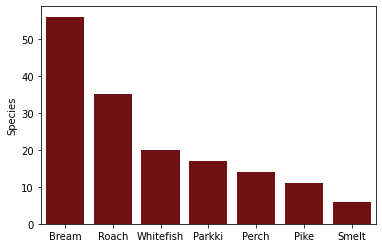

In [9]:
sns.barplot(x=data['Species'].unique(),y=data['Species'].value_counts(),data=data,color="maroon");

The barplot shows that bream is the type where the is maximum number of fishes 

<b> Removing Outliers</b>

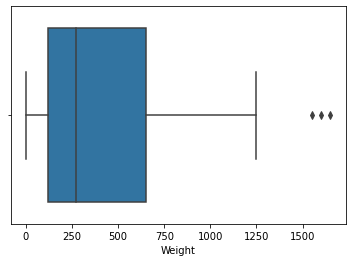

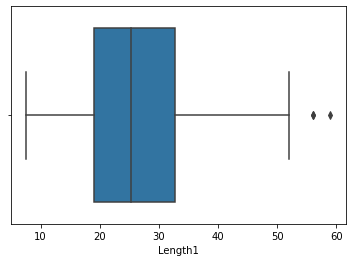

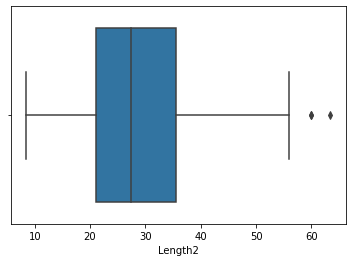

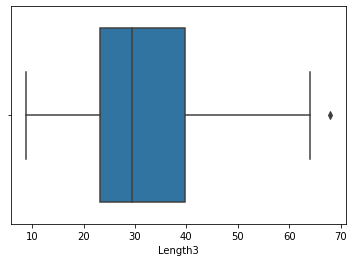

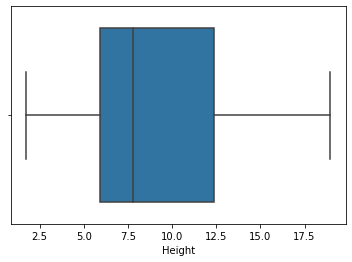

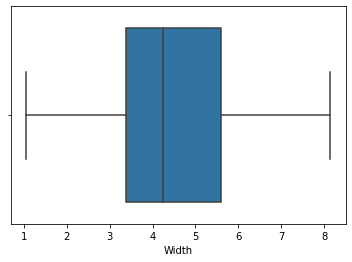

In [10]:
for i in ['Weight', 'Length1', 'Length2','Length3','Height','Width']:
            sns.boxplot(x=data[i],data=data)
            plt.show()

In [21]:
for values in ['Weight', 'Length1', 'Length2','Length3']:
    
    q1 = np.percentile( data[values], 25, interpolation = 'midpoint')
    q3 = np.percentile( data[values], 75, interpolation = 'midpoint')
    
    iqr= q3-q1
    
    data.drop(data[(data[values]>=(q3+1.5*iqr))|(data[values]<=(q1-1.5*iqr))].index,inplace=True)

<b> We are taking the all the columns except height and width as its not having any outlier </b>

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  155 non-null    object 
 1   Weight   155 non-null    float64
 2   Length1  155 non-null    float64
 3   Length2  155 non-null    float64
 4   Length3  155 non-null    float64
 5   Height   155 non-null    float64
 6   Width    155 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


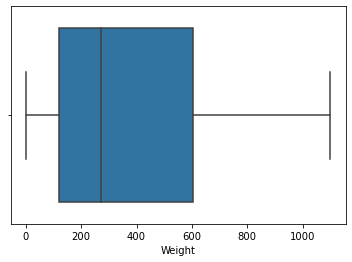

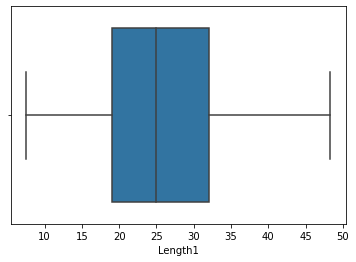

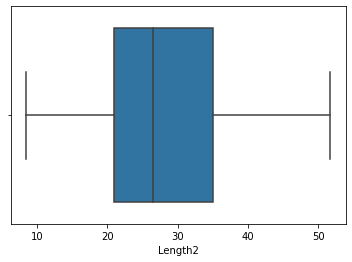

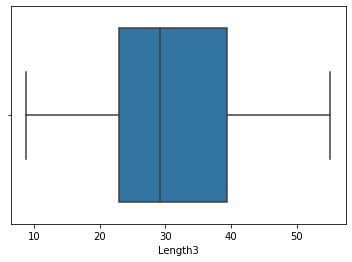

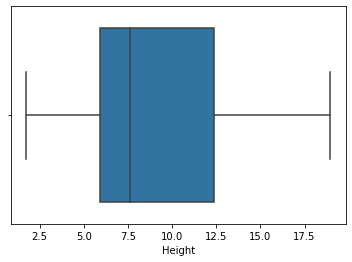

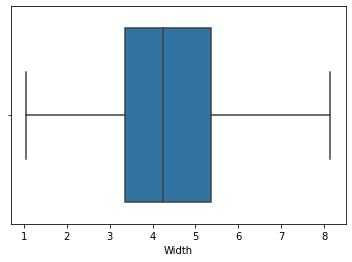

In [23]:
for i in ['Weight', 'Length1', 'Length2','Length3','Height','Width']:
            sns.boxplot(x=data[i],data=data)
            plt.show()

<b> We have no outliers as all the outliers have been removed</b>

<b> Univariate Analysis </b>

<b> KDE PLOT </b>

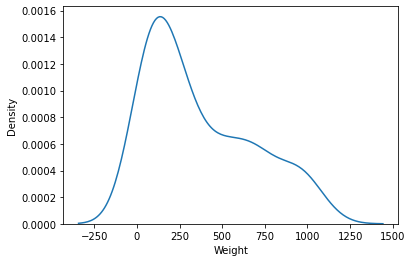

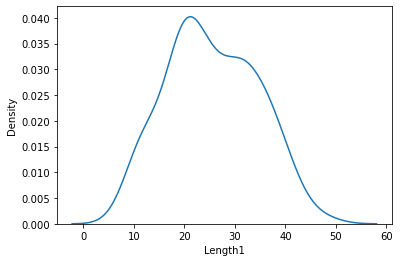

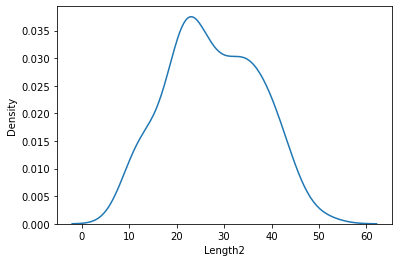

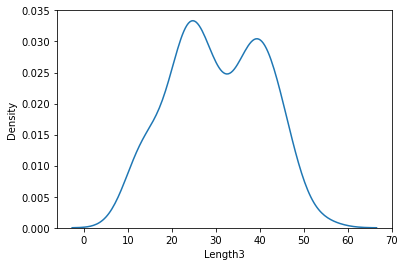

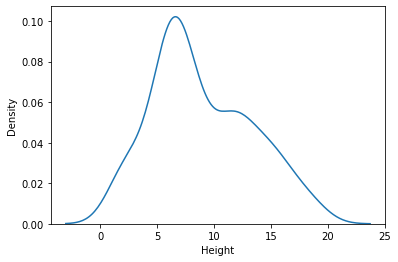

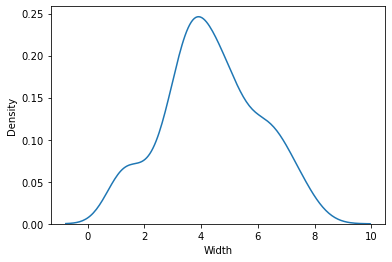

In [24]:
for i in ['Weight', 'Length1', 'Length2','Length3','Height','Width']:
    sns.kdeplot(data[i])
    plt.show()

<b> The graphs almost follow a normal distribution</b>

<AxesSubplot:xlabel='Species', ylabel='count'>

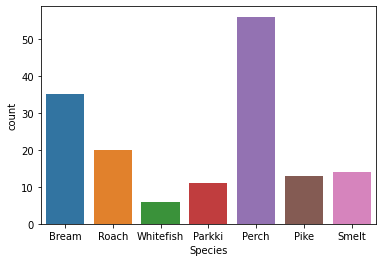

In [25]:
sns.countplot(x=data["Species"],data=data)

<b>The count plot shows that the count for each and every species catagories having perch to be the highest</b>

<b> Bivariate</b>

<b> We can take the scatter plot into consideration as it shows the relationship between the dependent and the independent variable </b>

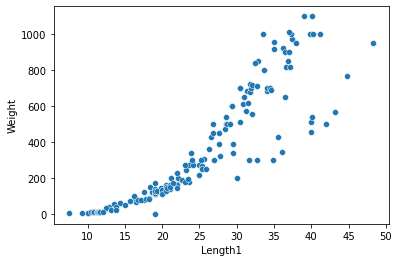

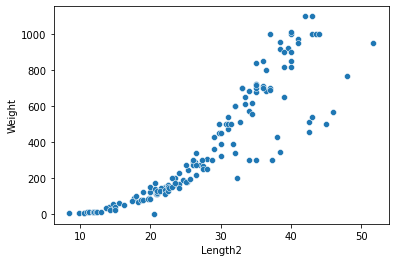

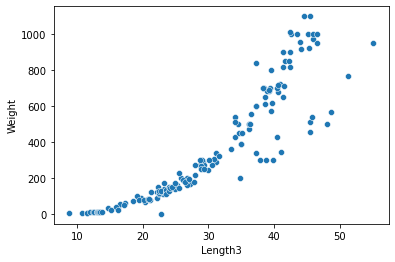

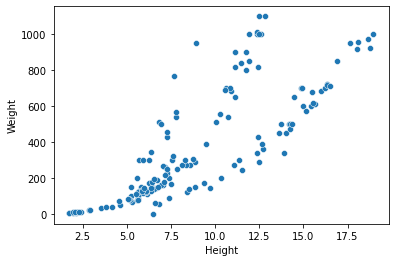

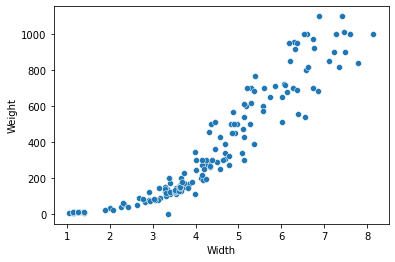

In [27]:
for i in [ 'Length1', 'Length2','Length3','Height','Width']:
    sns.scatterplot(x=data[i],y=data["Weight"])
    plt.show()

<b> This shows that the relationship between the dependent and independent variable show a Linear Relationship</b>

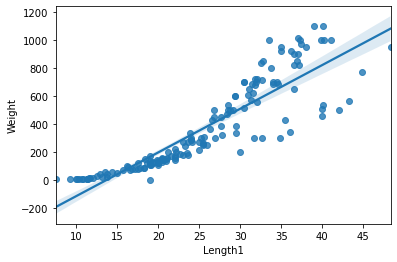

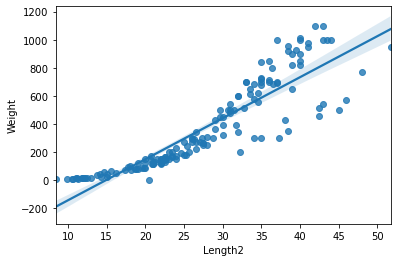

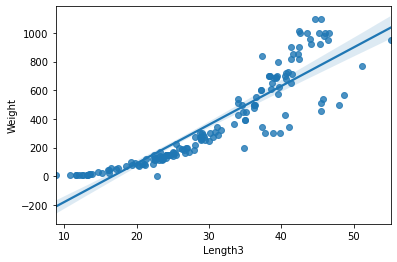

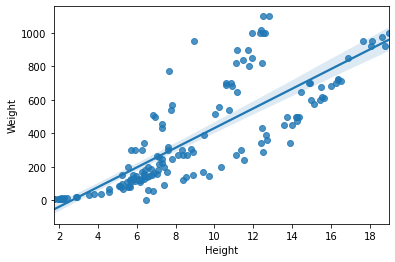

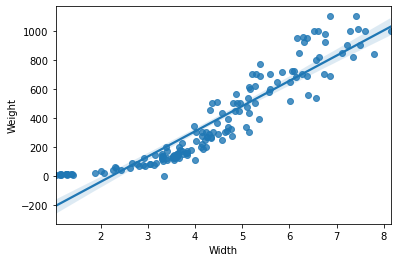

In [28]:
for i in [ 'Length1', 'Length2','Length3','Height','Width']:
    sns.regplot(x=data[i],y=data["Weight"],data=data)
    plt.show()

<b>This plot shows the confidence interval with which we can say the observations are split and it can converge with the regression line</b>

<b> Multivariate Analyis</b>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:298: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)


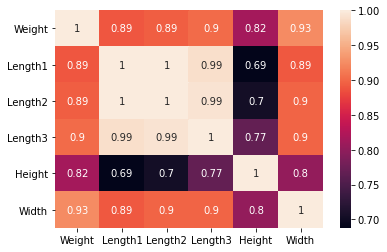

In [30]:
data.corr() 
sns.heatmap(data=data.corr(),annot=True,color="rgb");

<b> Heat map shows the correlation between the variables we might have to remove Length1 and Length2 as it has evidence of multicollinearity</b> 

<b>Pair_Plot</b>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


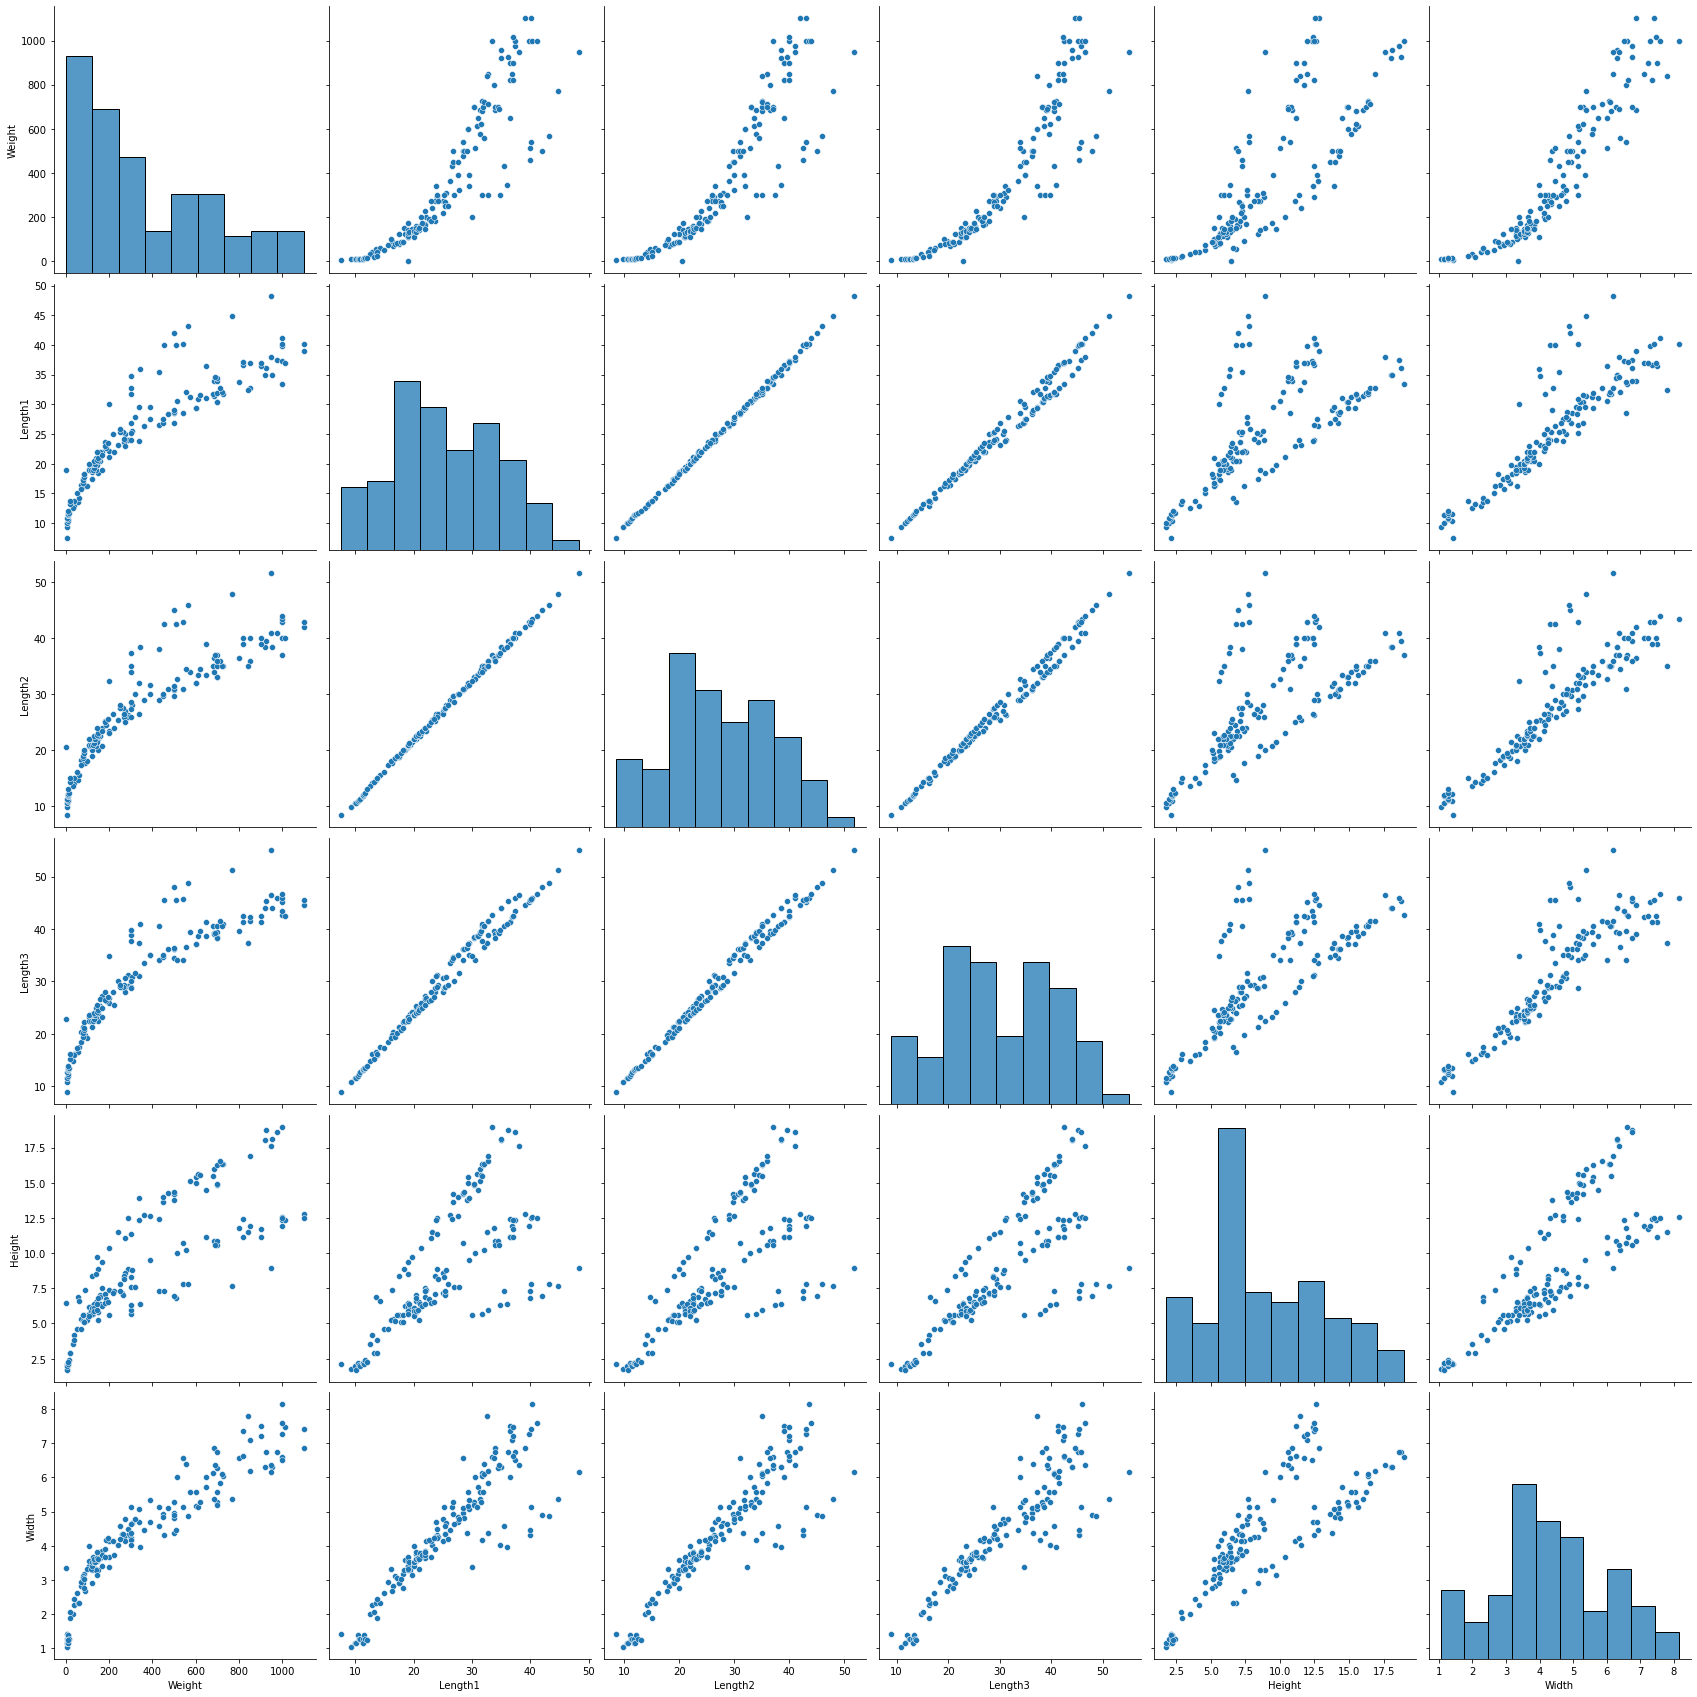

In [31]:
sns.pairplot(data,size=4)
plt.show()

<b>Regression_Analysis</b>

<b>One_HotEncoding</b>
This is done to convert the categorical variables into the numeric variables as in linear regression can always take numeric values

In [32]:
df=data.copy()
one_hot=pd.get_dummies(data['Species'])
df = data.join(one_hot)
df = df.drop('Species',1)
df

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


<b>The variables are split into catagorical and numeric variables</b>

In [33]:
x_ind=df.drop("Weight",axis=1)
x_ind

,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


In [34]:
y_dep=pd.DataFrame(data=df,columns=['Weight'])

In [35]:
y_dep

,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0
...,...
154,12.2
155,13.4
156,12.2
157,19.7


<b>Linearity Check</b>

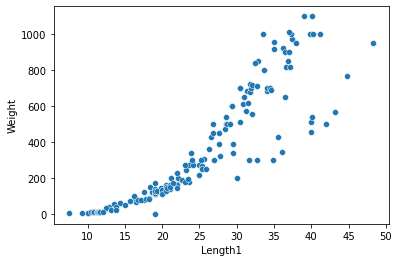

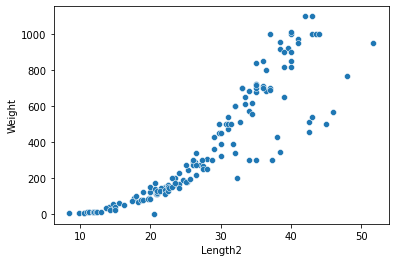

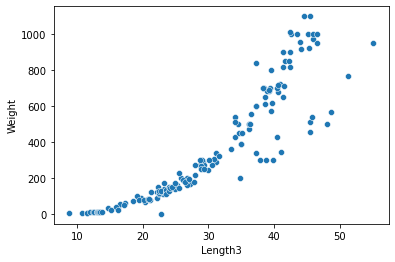

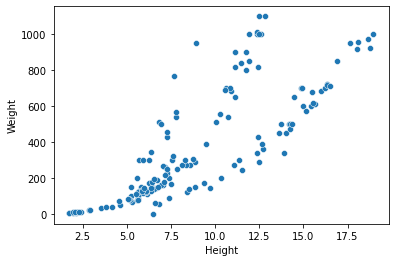

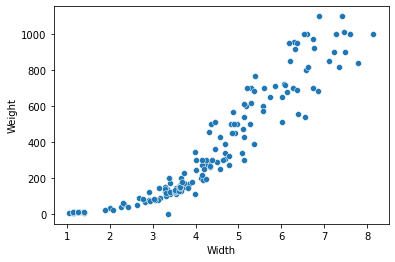

In [36]:
for i in ['Length1','Length2','Length3','Height','Width']:
    sns.scatterplot(x=data[i],y=data["Weight"])
    plt.show()

<b>The relationship between dependent and independent variable show a linear relationship</b>

In [37]:
data.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.890173,0.894415,0.902576,0.815237,0.925664
Length1,0.890173,1.000000,0.999385,0.990205,0.688050,0.891260
Length2,0.894415,0.999385,1.000000,0.992765,0.704041,0.897855
Length3,0.902576,0.990205,0.992765,1.000000,0.768038,0.898315
Height,0.815237,0.688050,0.704041,0.768038,1.000000,0.803268
Width,0.925664,0.891260,0.897855,0.898315,0.803268,1.000000


<b> This table shows the correlation between the variables ie both dependent and independent </b>

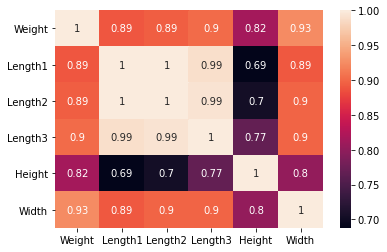

In [38]:
sns.heatmap(data=data.corr(),annot=True);

<b>This shows the correlation between dependent and independent variable _ Graphical Representation</b>

In [39]:
for i in ['Length1','Length2','Length3','Height','Width']:
    print("\nCorrelation between Weight and",i,":")
    correlation,p_value=0,0
    correlation,p_value=pearsonr(x=data[i],y=data['Weight'])
    print("Correlation = ",correlation,"\nP_value = ",p_value)
    if p_value>0.05:
        print("Not Significant.")
    else:
        print("Significant.")  


Correlation between Weight and Length1 :
Correlation =  0.8901726157637448 
P_value =  4.22090595276036e-54
Significant.

Correlation between Weight and Length2 :
Correlation =  0.8944147184405444 
P_value =  2.4499022426568922e-55
Significant.

Correlation between Weight and Length3 :
Correlation =  0.9025762705234317 
P_value =  7.16618164417165e-58
Significant.

Correlation between Weight and Height :
Correlation =  0.8152373359623633 
P_value =  3.98649898509981e-38
Significant.

Correlation between Weight and Width :
Correlation =  0.9256643893867587 
P_value =  1.8152816421666658e-66
Significant.


<b>The values are significant thus showing a linear relationship as the null hypothesis suggests : The correlation coefficient is 0 and the alternative hypothesis that the correlation coefficient is not 0 , Thus we reject null and accept alternative hypothesis </b>

<b> Normality</b>

<b> Normality for the Dependent Feature is tested </b>

<AxesSubplot:xlabel='Weight', ylabel='Density'>

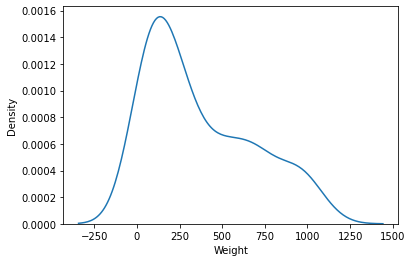

In [78]:
sns.kdeplot(data["Weight"]) 

In [41]:
s,p=shapiro(data["Weight"])
print("Stats",s,"p_val",p)
if p>0.05:
    print("Significant")
else:
    print("Not Significant ")

Stats 0.8948888778686523 p_val 4.459278724056048e-09
Not sign


<b> The shapiro test proves that the normality of the dependent feature does not have a significant change in the normal distribution</b>

<b> We are separating dependent variable and the independent variables </b>

In [59]:
x_ind=df.drop(columns=['Weight'],axis=1)
x_ind.head()

,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [60]:
y_dep=df["Weight"]
y_dep.head()


0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

<b> Multicollinearity</b>

<b> We are checking if there is a multicollinearity of the features as when we are fitting the model if the independent features change as per the own means then the model wont be accurate . There would be relationship between more independent features making it dependent features</b>

In [44]:
vif = pd.DataFrame()
vif["Features"]=x_ind.columns
vif["VIF"]=[variance_inflation_factor(x_ind.values,i) for i in range(len(x_ind.columns))]

In [45]:
vif

,Features,VIF
0,Length1,11640.943653
1,Length2,15183.972890
2,Length3,3093.805839
3,Height,75.546906
4,Width,96.285071


<b> Cause of high VIF values we are dropping the Length1 , Length 2 , Length 3 columns</b>

In [46]:
x_ind1=x_ind.drop(columns=["Length1","Length2","Length3"],axis=1)
x_ind1.head()

,Height,Width
0,11.5200,4.0200
1,12.4800,4.3056
2,12.3778,4.6961
3,12.7300,4.4555
4,12.4440,5.1340


<b>Autocorrelation</b>

<b>Auto correlation is used to test the data if its features are self correlated . Generally lag must be considered while doing auto correlation test . Durbin Watson test is used to check for auto correlation it has range of 0 to 4 and 2 is considered as a threshold value as its the median </b>

<b>Feature Transformation is done because the independent and dependent variables do not exactly follow normal distribution so the feature is transformed in such a way that it fits the distribution</b>

<b>Homoscadicity</b> 

<b> Homoscadicity is used to check if the errors are having uniform variance the test used for it are brush Pagen and Goldfell Quand Test</b>

<b> Fitting the Linear Regression Model and Forming the Regression Equation</b>

In [113]:

x_train,x_test,y_train,y_test=train_test_split(x_ind1,y_dep,test_size=0.3,random_state=48)

In [62]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(108, 2)
(47, 2)
(108,)
(47,)


In [63]:
lm=linear_model.LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [64]:
train_pred=lm.predict(x_train)

In [65]:
train_pred

array([ 835.84522294,  130.06488459, -196.69408058,  851.52305996,
        173.59574572,  898.02807978, -111.19139631,  360.55627316,
       -214.64242147,  242.69347054,  348.30909445,  519.31046131,
        170.12418657,  271.90063152,  203.08884435,  239.98880523,
        660.80602076,  261.01330455,  858.52928114,  386.85510465,
        533.31805746,  782.83437137,  191.96653407,  285.13227586,
       -217.55974441,  580.80671438,  333.85850557,  190.63424117,
        221.50080509,  699.32614608,  301.1467254 ,  304.00774333,
       -217.82366009,  266.76117359,  110.89227341,  186.75958351,
        337.69495895,  750.12861646,  759.65007138,   78.78214864,
        322.83113189,  811.20799734,  -11.89790963,  195.80641527,
        475.96897278,  383.81755531,  734.34847334,  405.9024685 ,
        371.67356776,  188.57650741,  155.1840955 ,  411.28525207,
        576.86882647,  223.42553214,  220.187572  ,  651.90668322,
        878.53988494,  647.82231615,  749.91325573,  432.94531

In [68]:
mse = mean_squared_error(y_train,train_pred)

In [69]:
mse

12030.185214215002

In [70]:
root_mse=np.sqrt(mse)

In [71]:
root_mse

109.68220099093108

In [72]:
r2_score(y_train,train_pred)

0.8767730527444283

<b> Intercept</b>

In [73]:
lm.intercept_

-447.2978094608154

In [74]:
lm.coef_

array([ 14.42564536, 156.34713485])

In [75]:
error=y_train-train_pred

In [76]:
error

119     14.154777
38     -43.064885
72     202.594081
120     48.476940
86     -53.595746
          ...    
64     -10.001666
91     -73.780786
81      25.592422
51     -85.622878
0     -105.401107
Name: Weight, Length: 108, dtype: float64

<AxesSubplot:xlabel='Weight', ylabel='Density'>

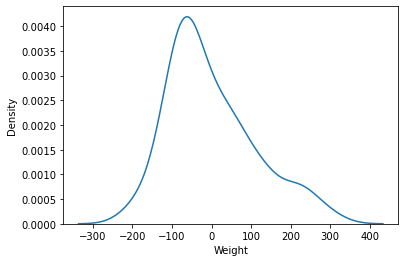

In [77]:
sns.kdeplot(error)

<b> Since the errors follow the normal distribution its not needed for us to do any transformation</b>

In [79]:
test_pred = lm.predict(x_test)
test_pred

array([ 101.61036528,  641.71593399, -237.48776037,  225.61619252,
        256.97462079,  418.58025451, -242.81547435,   77.44287105,
        251.45648392,  556.47933095,  884.926453  ,  334.44564471,
        700.60545438,   30.39364438, 1007.50139667,  201.18793151,
         70.29829778,  797.31173379,  504.0133439 ,  206.12104203,
        194.89713184,  512.76782579,    9.4010847 ,  656.98994599,
       -258.42523883,  147.36132401, -199.86004615,  512.0461631 ,
        -82.65501829,  323.82696972,  333.53137919,  185.18648074,
        274.74039559, -218.10988302,  534.90111178,  160.78957233,
        -83.83494062,  378.666696  ,  876.45088515, -213.8389771 ,
        172.58320927,  422.63980295,  116.03864691,  208.22329384,
        638.28847108,  937.2651339 , -235.94886716])

In [80]:
mse_test = mean_squared_error(y_test,test_pred)

In [81]:
mse_test

15156.701905952812

In [82]:
rmse_test=np.sqrt(mean_squared_error(y_test,test_pred))

In [83]:
rmse_test

123.11255787267525

In [84]:
r2_score(y_test,test_pred)

0.8297188351964183

In [115]:
error1=y_test-test_pred


In [86]:
error1

119     14.154777
38     -43.064885
72     202.594081
120     48.476940
86     -53.595746
          ...    
64     -10.001666
91     -73.780786
81      25.592422
51     -85.622878
0     -105.401107
Name: Weight, Length: 108, dtype: float64

<AxesSubplot:xlabel='Weight', ylabel='Density'>

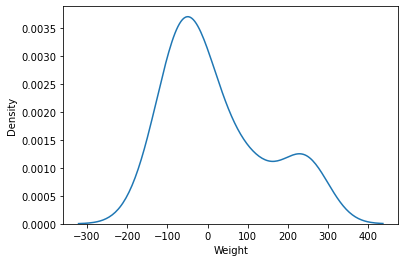

In [116]:
sns.kdeplot(error1)

<b>The curve almost follows a normal distribution , Neednt do box-cox transformation</b>

<b> Adding a constant</b>

In [88]:
x_train1=sm.add_constant(x_train)
x_train1

,const,Height,Width
119,1.0,11.9286,7.1064
38,1.0,5.6166,3.1746
72,1.0,2.1120,1.4080
120,1.0,11.7300,7.2250
86,1.0,6.1100,3.4075
...,...,...,...
64,1.0,8.3922,2.9181
91,1.0,5.8560,3.6240
81,1.0,5.0820,2.7720
51,1.0,7.0866,3.9060


In [93]:
model = sm.OLS(y_train,x_train1).fit()

In [94]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     373.5
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           1.83e-48
Time:                        11:52:34   Log-Likelihood:                -660.58
No. Observations:                 108   AIC:                             1327.
Df Residuals:                     105   BIC:                             1335.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -447.2978     33.100    -13.513      0.000    -512.930    -381.666
Height        14.4256      4.089      3.528      0.001       6.318      22.534
Width        156.3471     11.031     14.174      0.000     134.476     178.219
==============================================================================
Omnibus:                       10.587   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.353
Skew:                           0.793   Prob(JB):                      0.00343
Kurtosis:                       3.076   Cond. No.                         36.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b> The model shows 87% accuracy </b>

<b>The linear regression equation is</b>

In [98]:
print ("y=",lm.intercept_,"b0+",lm.coef_[0],"b1")

y= -447.2978094608154 b0+ 14.425645364725446 b1


In [99]:
print ("y=",lm.intercept_,"b0+",lm.coef_[1],"b1")

y= -447.2978094608154 b0+ 156.34713485056923 b1


Compare real and predicted weights and give a conclusion statement based on it?

In [118]:
total=pd.DataFrame()
total["Actual"]=y_test
total["Predicted"]=test_pred
total["Errors"]=total["Actual"]-total["Predicted"]
total

,Actual,Predicted,Errors
80,85.0,101.610365,-16.610365
20,575.0,641.715934,-66.715934
146,7.5,-237.487760,244.987760
95,170.0,225.616193,-55.616193
90,110.0,256.974621,-146.974621
137,500.0,418.580255,81.419745
147,7.0,-242.815474,249.815474
63,90.0,77.442871,12.557129
45,160.0,251.456484,-91.456484
10,475.0,556.479331,-81.479331


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

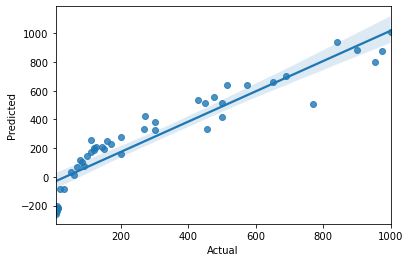

In [112]:
sns.regplot(x=total["Actual"],y=total["Predicted"])

<b>The Actual and Predicted variable fall into the regression line veryclose to it and hence the confidence variable . Hence we can perform the the optimisation techniques to reduce the distance between the actual and predicted variable
Since its an over fit model we have to take boosting techniques or optimising Techniques to do the analysis
</b>